# cifar10 데이터셋 분석

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
# 모델 도식화 가능
from keras.utils import plot_model
from keras import Sequential
from keras.utils import set_random_seed


In [2]:
# 모델 도식화 가능
# %pip install pydotplus
# %pip install pydot
# %pip install graphviz
# %pip install --upgrade pip

In [17]:
# 데이터 로딩
(train_x, train_y), (test_x, test_y) = load_data()

In [18]:
# 표준화
train_scaled = train_x / 255.0
test_scaled = test_x / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_y, test_size=0.2, random_state=42)

In [19]:
# 값 살펴보기
print(train_scaled.shape, train_target.shape)

(40000, 32, 32, 3) (40000, 1)


### DNN으로 모델링

In [29]:
md = Sequential(name='cifar10')
md.add(Flatten(input_shape=(32,32,3), name='flatten'))
md.add(Dense(100, activation='relu'))
# md.add(Dropout(0.3))
md.add(Dense(100, activation='relu'))
# md.add(Dropout(0.3))
md.add(Dense(10, activation='softmax'))
md.summary()

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_23 (Dense)            (None, 100)               307300    
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


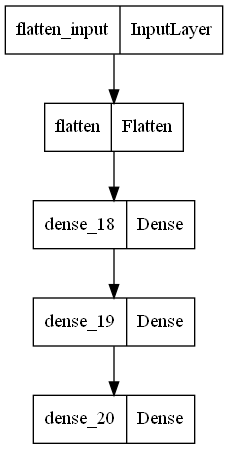

In [25]:
plot_model(md)

In [31]:
md.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics='accuracy')
md.fit(train_scaled, train_target, epochs=100)
md.evaluate(val_scaled, val_target)

Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5454 - accuracy: 0.4549
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5215 - accuracy: 0.4607
Epoch 3/100
1250/1250 [==============================] - 4s 4ms/step - loss: 1.4945 - accuracy: 0.4717
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4756 - accuracy: 0.4756
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4524 - accuracy: 0.4878
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4342 - accuracy: 0.4918
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4129 - accuracy: 0.5007
Epoch 8/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3969 - accuracy: 0.5048
Epoch 9/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3802 - accuracy: 0.5102
Epoch 10/100
1250/1250 [==============================] - 4s 3ms/step - l

[1.6942228078842163, 0.5087000131607056]

### 중간 결론
- DNN만으로는 test_data의 정확도를 높이기엔 한계가 있다. (기껏해야 0.5정도)
- 다른 방법을 쓰자 -> CNN


### CNN 사용해서 모델링

In [35]:
set_random_seed(42)

In [37]:
md = Sequential()
md.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
md.add(MaxPool2D(2))
md.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
md.add(MaxPool2D(2))
md.add(Flatten())
md.add(Dense(100, activation='relu'))
md.add(Dropout(0.4))
md.add(Dense(10, activation='softmax'))
md.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 4096)              0         
                                                                 
 dense_26 (Dense)            (None, 100)              

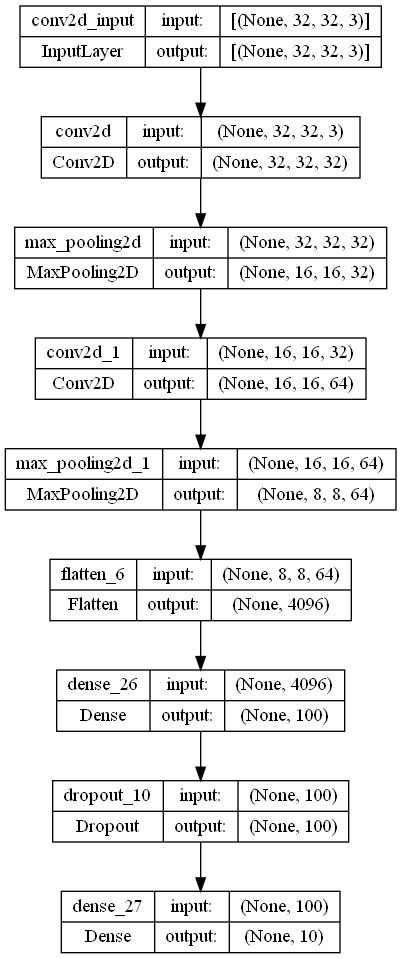

In [39]:
plot_model(md, show_shapes=True)

In [40]:
md.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = md.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1250/1250 [==============================] - 46s 36ms/step - loss: 1.6035 - accuracy: 0.4144 - val_loss: 1.2380 - val_accuracy: 0.5650
Epoch 2/20
1250/1250 [==============================] - 55s 44ms/step - loss: 1.2570 - accuracy: 0.5530 - val_loss: 1.0723 - val_accuracy: 0.6204
Epoch 3/20
1250/1250 [==============================] - 52s 41ms/step - loss: 1.1160 - accuracy: 0.6061 - val_loss: 0.9748 - val_accuracy: 0.6554
Epoch 4/20
1250/1250 [==============================] - 51s 41ms/step - loss: 1.0356 - accuracy: 0.6332 - val_loss: 0.9310 - val_accuracy: 0.6716
Epoch 5/20
1250/1250 [==============================] - 54s 43ms/step - loss: 0.9624 - accuracy: 0.6587 - val_loss: 0.9192 - val_accuracy: 0.6712
Epoch 6/20
1250/1250 [==============================] - 50s 40ms/step - loss: 0.9063 - accuracy: 0.6792 - val_loss: 0.8825 - val_accuracy: 0.6936
Epoch 7/20
1250/1250 [==============================] - 50s 40ms/step - loss: 0.8502 - accuracy: 0.6951 - val_loss: 0.8957 -

In [44]:
md.evaluate(test_scaled, test_y)

313/313 [==============================] - 3s 9ms/step - loss: 1.0590 - accuracy: 0.7037


[1.0590109825134277, 0.7037000060081482]

## 예측

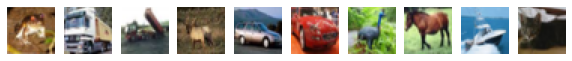

         real     predict
0        frog         cat
1       truck       truck
2       truck       truck
3        deer        deer
4  automobile  automobile
5  automobile  automobile
6        bird        frog
7       horse       horse
8        ship        ship
9         cat       truck


In [97]:
dic = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
fig, axs = plt.subplots(1,10, figsize=(10,10))
realPredict = []
for i in range(10):
    pred = md.predict(train_x[i].reshape(-1,32,32,3), verbose=0)
    pred = dic[pred[0].argmax()]
    real = dic[train_y[i][0]]
    realPredict.append([real, pred])
    axs[i].imshow(train_x[i])
    axs[i].axis('off')
plt.show()
print(pd.DataFrame(realPredict, columns=['real', 'predict']))

In [10]:
# %pip install pillow
from PIL import Image
image = Image.open('cat.png')
np.array(image)

array([[[143, 136, 117, 255],
        [122, 117, 101, 255],
        [ 57,  53,  39, 255],
        ...,
        [182, 174, 167, 255],
        [178, 167, 159, 255],
        [127, 115,  96, 255]],

       [[137, 130, 112, 255],
        [125, 120, 104, 255],
        [ 71,  68,  55, 255],
        ...,
        [193, 190, 186, 255],
        [196, 191, 188, 255],
        [200, 196, 193, 255]],

       [[132, 125, 111, 255],
        [118, 115, 102, 255],
        [ 76,  76,  67, 255],
        ...,
        [198, 194, 190, 255],
        [196, 192, 188, 255],
        [200, 195, 192, 255]],

       ...,

       [[188, 189, 184, 255],
        [138, 141, 143, 255],
        [139, 142, 144, 255],
        ...,
        [231, 231, 229, 255],
        [204, 204, 206, 255],
        [222, 221, 220, 255]],

       [[194, 194, 188, 255],
        [171, 173, 171, 255],
        [178, 178, 176, 255],
        ...,
        [189, 190, 192, 255],
        [229, 229, 227, 255],
        [229, 229, 227, 255]],

       [[194

## 결과
- DNN: 0.5, CNN: 0.7 정도로 0.2만큼이나 개선된걸 확인 가능

In [20]:
md = Sequential()
md.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
md.add(Dropout(0.4))
md.add(MaxPool2D(2))
md.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
md.add(Dropout(0.4))
md.add(MaxPool2D(2))
md.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
md.add(Dropout(0.4))
md.add(MaxPool2D(2))
md.add(Flatten())
md.add(Dense(100, activation='relu'))
md.add(Dropout(0.4))
md.add(Dense(10, activation='softmax'))
md.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [21]:
sgd = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)
md.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

history = md.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1250/1250 [==============================] - 83s 66ms/step - loss: 1.7851 - accuracy: 0.3384 - val_loss: 1.7529 - val_accuracy: 0.3490
Epoch 2/20
1250/1250 [==============================] - 92s 74ms/step - loss: 1.4628 - accuracy: 0.4708 - val_loss: 1.5407 - val_accuracy: 0.4767
Epoch 3/20
1250/1250 [==============================] - 94s 75ms/step - loss: 1.3345 - accuracy: 0.5204 - val_loss: 1.3674 - val_accuracy: 0.5214
Epoch 4/20
1250/1250 [==============================] - 95s 76ms/step - loss: 1.2689 - accuracy: 0.5497 - val_loss: 1.6526 - val_accuracy: 0.4090
Epoch 5/20
1250/1250 [==============================] - 90s 72ms/step - loss: 1.2143 - accuracy: 0.5725 - val_loss: 1.3246 - val_accuracy: 0.5614
Epoch 6/20
1250/1250 [==============================] - 102s 81ms/step - loss: 1.1695 - accuracy: 0.5894 - val_loss: 1.3504 - val_accuracy: 0.5222
Epoch 7/20
1250/1250 [==============================] - 107s 86ms/step - loss: 1.1474 - accuracy: 0.5969 - val_loss: 1.3059

## VGG16 이용해서 구하기

In [28]:
from keras.applications import VGG16
vgg = VGG16(input_shape=(32,32,3),weights='imagenet', include_top=False)
md.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
md.fit(train_scaled, train_target)

 150/1250 [==>...........................] - ETA: 34:14 - loss: 2.6223 - accuracy: 0.1017

KeyboardInterrupt: 

In [26]:
md.evaluate(test_scaled, test_y)

313/313 [==============================] - 55s 175ms/step - loss: 2.3026 - accuracy: 0.0986


[2.3025870323181152, 0.09860000014305115]